In [2]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import pandas as pd
import numpy as np 

df = pd.read_csv('PBL_TEST_HRod_211029.csv')
df = df.dropna()
df = df[['A11', 'A12', 'A21', 'A22', 'D1', 'D2', 'vonMises']]
X = np.array(df[['A11', 'A12', 'A21', 'A22', 'D1', 'D2']])
y = np.array(df[['vonMises']])
kernel = DotProduct()
gpr = GaussianProcessRegressor(kernel=kernel,  random_state=0).fit(X, y)
print(f'평가지표(the coefficient of determination of the prediction, r^2, 1 is best): {gpr.score(X, y)}')
gpr.predict(X[:2,:], return_std=True)
# gpr.predict([[-10, 0, -20, 0, 40, 68]], return_std=True)

평가지표(the coefficient of determination of the prediction, r^2, 1 is best): 0.8372618042179459


(array([[251.],
        [274.]]), array([18.50067951,  9.75324836]))

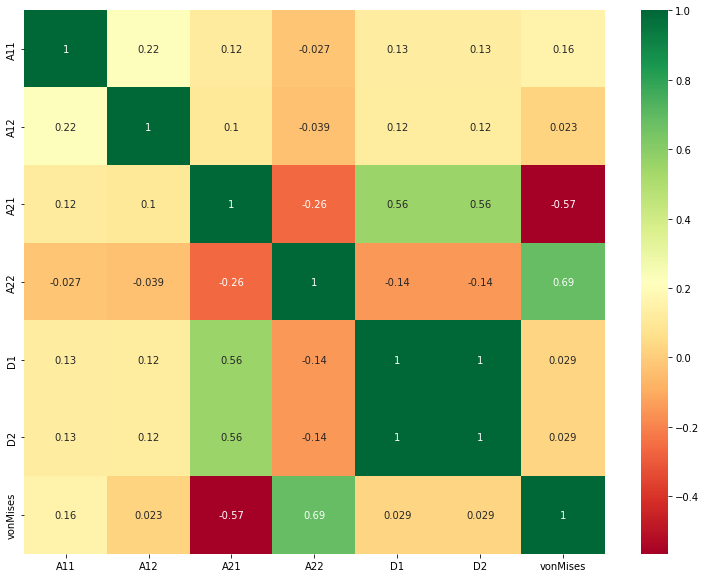

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df = pd.read_csv('PBL_TEST_HRod_211029.csv')
df = df.dropna()
df = df[['A11', 'A12', 'A21', 'A22', 'D1', 'D2', 'vonMises']]

# plot
plt.figure(figsize=(13,10))
g = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [13]:
corr_matrix = df.corr()
corr_matrix['vonMises']

입력하중             NaN
PIPE 길이          NaN
PIPE 직경          NaN
용접길이             NaN
A11         0.157369
A12         0.022921
A21        -0.565570
A22         0.685932
D1          0.029077
D2          0.029077
vonMises    1.000000
Name: vonMises, dtype: float64

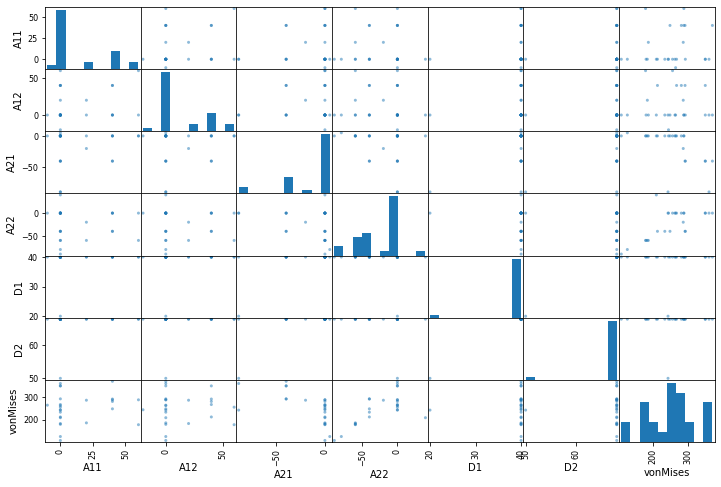

In [14]:
from pandas.plotting import scatter_matrix

attributes = ['A11', 'A12', 'A21', 'A22', 'D1', 'D2', 'vonMises']
scatter_matrix(df[attributes], figsize=(12,8));



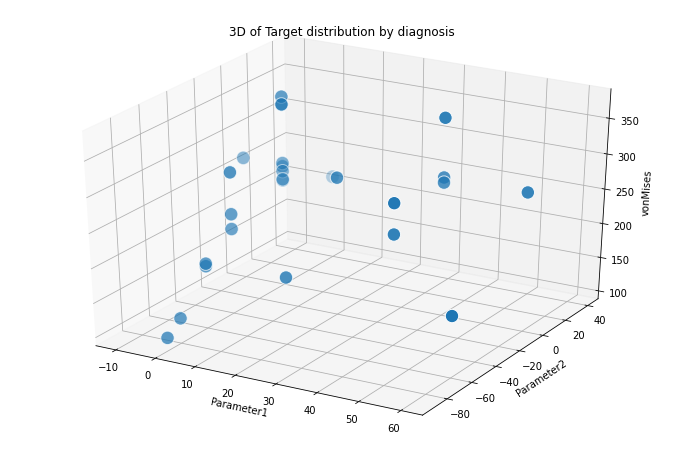

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['A11'], df['A22'], df['vonMises'],s=180, edgecolors='white')

ax.set_title('3D of Target distribution by diagnosis')
ax.set_xlabel('Parameter1')
ax.set_ylabel('Parameter2')
ax.set_zlabel('vonMises')
plt.show()